In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [20]:
df=pd.read_csv('processed.csv')
print('Data shape:',df.shape)

Data shape: (1069, 22)


In [21]:
list(enumerate(df.columns))

[(0, 'w/b'),
 (1, 'Water'),
 (2, 'Cement type'),
 (3, 'Cement'),
 (4, 'Slag'),
 (5, 'Fly ash'),
 (6, 'Silica fume'),
 (7, 'Lime filler'),
 (8, 'FA'),
 (9, 'CA'),
 (10, 'Plasticizer'),
 (11, 'Superplasticizer'),
 (12, 'Air entraining'),
 (13, 'Comp. str. test age'),
 (14, 'Compressive strength'),
 (15, 'Air content'),
 (16, 'Spreed'),
 (17, 'Slump'),
 (18, 'Fresh density'),
 (19, 'Dry  density'),
 (20, 'Migration test age'),
 (21, 'Migration resistance')]

1-hot encoding

In [22]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X=ct.fit_transform(df)
# remove dummy variable and output
y=X[:,-1]
X=X[:,1:-1]
print(X.shape)
print(y.shape)

(1069, 30)
(1069,)


Decision Tree

{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
{'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
{'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test acc: 0.7988372603220569
Train acc: 1.0


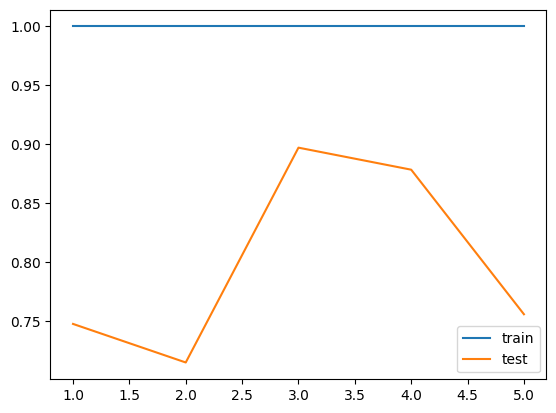

In [23]:
acc_train=[]
acc_test=[]
param_grid={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [10,50,100,200],
    'max_features': [None,1,2,3,4,5],
    'max_depth': [None,2,4,5,6],
    'min_samples_leaf': [1,3,4,5],
    'min_samples_split': [2,4,6,8,10]
}
for train_index, test_index in StratifiedKFold().split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    clf = RandomForestClassifier(random_state=0)
    grid=GridSearchCV(clf,param_grid,cv=5,n_jobs=-1,scoring='accuracy')
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    acc_train.append(accuracy_score(y_train,grid.predict(X_train)))
    acc_test.append(accuracy_score(y_test,grid.predict(X_test)))
print('Test acc:',np.mean(acc_test))
print('Train acc:',np.mean(acc_train))
plt.plot(range(1,6),acc_train)
plt.plot(range(1,6),acc_test)
plt.legend(['train','test'])

In [24]:
acc_train

[1.0, 1.0, 1.0, 1.0, 1.0]

In [25]:
acc_test

[0.7476635514018691,
 0.7149532710280374,
 0.897196261682243,
 0.8785046728971962,
 0.755868544600939]